In [17]:
import networkx as nx
import random
import os
import matplotlib.pyplot as plt

In [3]:
import networkx as nx
print(nx.__version__)

2.8.8


In [53]:
import os
import random
import networkx as nx

# Parameters
num_nodes = 1000  # Number of nodes in the graph
initial_edges = 1  # Number of edges to attach from a new node to existing nodes in the Barabási-Albert graph
num_snapshots = 12  # Number of snapshots to generate
additional_edges_per_step = 50  # Number of edges to add at each step
edges_to_remove_per_snapshot = 100  # Number of edges to randomly remove in each snapshot
output_dir = "C:\\Priyanka\\dynamic-infmax-gnn-lstm\\data\\barabasi_albert_snapshots_500"  # Directory to save the gpickle files

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Generate the initial Barabási-Albert graph
G = nx.barabasi_albert_graph(num_nodes, initial_edges)

# Save the initial snapshot
initial_snapshot_path = os.path.join(output_dir, f"snapshot_0.gpickle")
nx.write_gpickle(G, initial_snapshot_path)
print(f"Snapshot 0: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges saved to {initial_snapshot_path}")

# Generate additional snapshots with progressive edge additions and removals
for i in range(1, num_snapshots):
    # Add additional edges
    nodes = list(G.nodes())  # Convert NodeView to a list
    for _ in range(additional_edges_per_step):
        # Randomly select two distinct nodes to add an edge
        node1, node2 = random.sample(nodes, 2)
        if not G.has_edge(node1, node2):  # Avoid duplicate edges
            G.add_edge(node1, node2)

    # Remove edges
    edges = list(G.edges())  # Convert EdgeView to a list
    for _ in range(min(edges_to_remove_per_snapshot, len(edges))):  # Ensure we don't try to remove more edges than exist
        edge_to_remove = random.choice(edges)
        G.remove_edge(*edge_to_remove)
        edges.remove(edge_to_remove)  # Update the list of edges after removal

    # Save the graph snapshot
    snapshot_path = os.path.join(output_dir, f"snapshot_{i}.gpickle")
    nx.write_gpickle(G, snapshot_path)
    
    # Log the number of nodes and edges
    print(f"Snapshot {i}: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges saved to {snapshot_path}")

print(f"Generated {num_snapshots} snapshots with progressively increasing edges and selective edge removals, saved to '{output_dir}' directory.")


Snapshot 0: 1000 nodes, 999 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_500\snapshot_0.gpickle
Snapshot 1: 1000 nodes, 949 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_500\snapshot_1.gpickle
Snapshot 2: 1000 nodes, 899 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_500\snapshot_2.gpickle
Snapshot 3: 1000 nodes, 849 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_500\snapshot_3.gpickle
Snapshot 4: 1000 nodes, 799 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_500\snapshot_4.gpickle
Snapshot 5: 1000 nodes, 749 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_500\snapshot_5.gpickle
Snapshot 6: 1000 nodes, 698 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_500\snapshot_6.gpickle
Snapshot 7: 1000 nodes, 648 edges saved to C:\Priyanka\dynamic-infmax

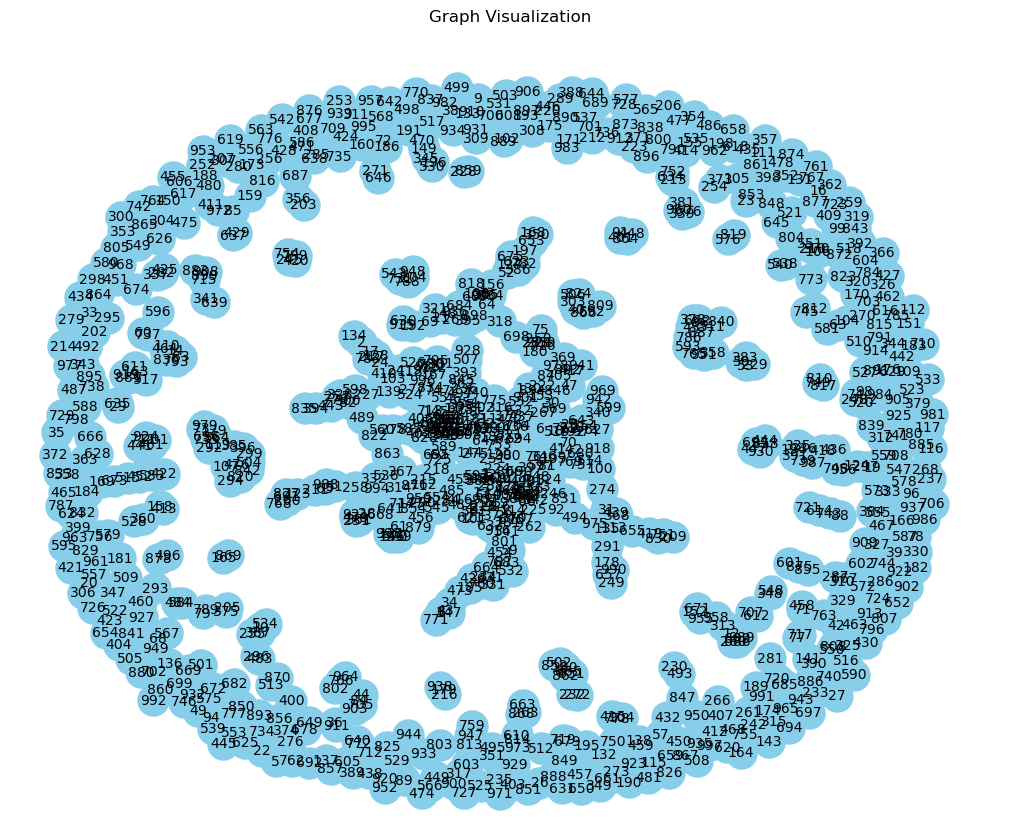


Details of Node 609:
  Features: No features found
  Label: No label found


In [54]:
# Path to a processed graph file
processed_graph_path = output_dir + "/snapshot_9.gpickle"  # Replace with the actual file path

# Load the graph
G = nx.read_gpickle(processed_graph_path)

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Compute layout for visualization
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=10)
plt.title("Graph Visualization")
plt.show()

# Select a random node and print its details
random_node = random.choice(list(G.nodes))
node_data = G.nodes[random_node]

print(f"\nDetails of Node {random_node}:")
print(f"  Features: {node_data.get('features', 'No features found')}")
print(f"  Label: {node_data.get('label', 'No label found')}")

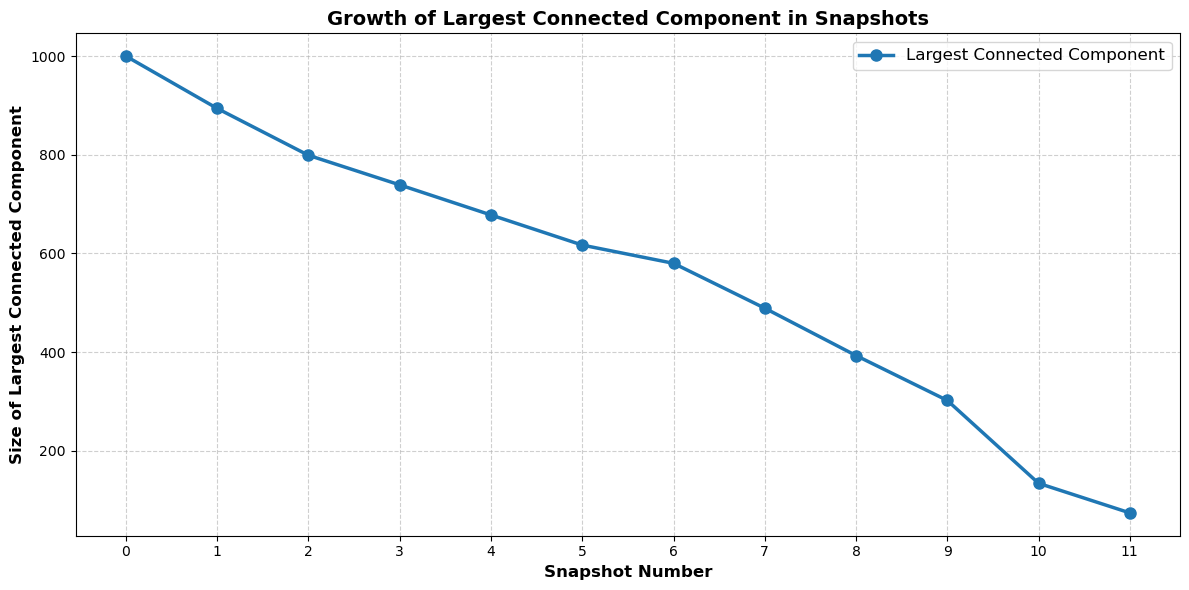

In [55]:
import matplotlib.pyplot as plt
import networkx as nx
import os

def plot_connected_components(directory_path, num_snapshots):
    """
    Plot the size of the largest connected component for each snapshot in the directory.
    
    Parameters:
        directory_path (str): Path to the directory containing graph snapshots.
        num_snapshots (int): Number of snapshots to process.
    """
    largest_components = []
    snapshots = []

    for i in range(num_snapshots):
        snapshot_path = os.path.join(directory_path, f"snapshot_{i}.gpickle")
        if os.path.exists(snapshot_path):
            # Read the graph
            G = nx.read_gpickle(snapshot_path)
            # Compute the size of the largest connected component
            largest_cc = len(max(nx.connected_components(G), key=len))
            largest_components.append(largest_cc)
            snapshots.append(i)
        else:
            print(f"Snapshot {i} not found in {directory_path}")
            break

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(snapshots, largest_components, marker='o', markersize=8, linewidth=2.5, label="Largest Connected Component")
    plt.title("Growth of Largest Connected Component in Snapshots", fontsize=14, fontweight='bold')
    plt.xlabel("Snapshot Number", fontsize=12, fontweight='bold')
    plt.ylabel("Size of Largest Connected Component", fontsize=12, fontweight='bold')
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.xticks(snapshots, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12, loc='best')
    plt.tight_layout()
    plt.show()

# Directory containing the graph snapshots
output_dir = "C:\\Priyanka\\dynamic-infmax-gnn-lstm\\data\\barabasi_albert_snapshots_500"

# Plot the size of the largest connected component for each snapshot
plot_connected_components(output_dir, num_snapshots=12)


In [70]:
import os
import random
import networkx as nx

# Parameters
num_nodes = 1000  # Number of nodes in the graph
initial_edges = 1  # Number of edges to attach from a new node to existing nodes in the Barabási-Albert graph
num_snapshots = 15  # Number of snapshots to generate
edges_to_remove_per_snapshot = 50  # Number of edges to randomly remove in each snapshot (1-10)
additional_edges_per_step_1 = 1  # Number of edges to add in snapshots 1-10
additional_edges_per_step_2 = 200  # Number of edges to add in snapshots 11-15
output_dir = "C:\\Priyanka\\dynamic-infmax-gnn-lstm\\data\\barabasi_albert_snapshots_1000"  # Directory to save the gpickle files

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Generate the initial Barabási-Albert graph
G = nx.barabasi_albert_graph(num_nodes, initial_edges)

# Save the initial snapshot
initial_snapshot_path = os.path.join(output_dir, f"snapshot_0.gpickle")
nx.write_gpickle(G, initial_snapshot_path)
print(f"Snapshot 0: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges saved to {initial_snapshot_path}")

# Generate snapshots
for i in range(1, num_snapshots + 1):
    nodes = list(G.nodes())  # Convert NodeView to a list

    # Determine edge addition count based on snapshot range
    if i <= 10:
        additional_edges_per_step = additional_edges_per_step_1
    else:
        additional_edges_per_step = additional_edges_per_step_2

    # Add additional edges
    for _ in range(additional_edges_per_step):
        # Randomly select two distinct nodes to add an edge
        node1, node2 = random.sample(nodes, 2)
        if not G.has_edge(node1, node2):  # Avoid duplicate edges
            G.add_edge(node1, node2)

    # Remove edges only for snapshots 1-10
    if i <= 10:
        edges = list(G.edges())  # Convert EdgeView to a list
        for _ in range(min(edges_to_remove_per_snapshot, len(edges))):  # Ensure we don't try to remove more edges than exist
            edge_to_remove = random.choice(edges)
            G.remove_edge(*edge_to_remove)
            edges.remove(edge_to_remove)  # Update the list of edges after removal

    # Save the graph snapshot
    snapshot_path = os.path.join(output_dir, f"snapshot_{i}.gpickle")
    nx.write_gpickle(G, snapshot_path)
    
    # Log the number of nodes and edges
    print(f"Snapshot {i}: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges saved to {snapshot_path}")

print(f"Generated {num_snapshots} snapshots with edge removal (1-10) and varying edge additions (1-10: {additional_edges_per_step_1}, 11-15: {additional_edges_per_step_2}), saved to '{output_dir}' directory.")


Snapshot 0: 1000 nodes, 999 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_1000\snapshot_0.gpickle
Snapshot 1: 1000 nodes, 950 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_1000\snapshot_1.gpickle
Snapshot 2: 1000 nodes, 901 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_1000\snapshot_2.gpickle
Snapshot 3: 1000 nodes, 852 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_1000\snapshot_3.gpickle
Snapshot 4: 1000 nodes, 803 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_1000\snapshot_4.gpickle
Snapshot 5: 1000 nodes, 754 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_1000\snapshot_5.gpickle
Snapshot 6: 1000 nodes, 705 edges saved to C:\Priyanka\dynamic-infmax-gnn-lstm\data\barabasi_albert_snapshots_1000\snapshot_6.gpickle
Snapshot 7: 1000 nodes, 656 edges saved to C:\Priyanka\dynamic

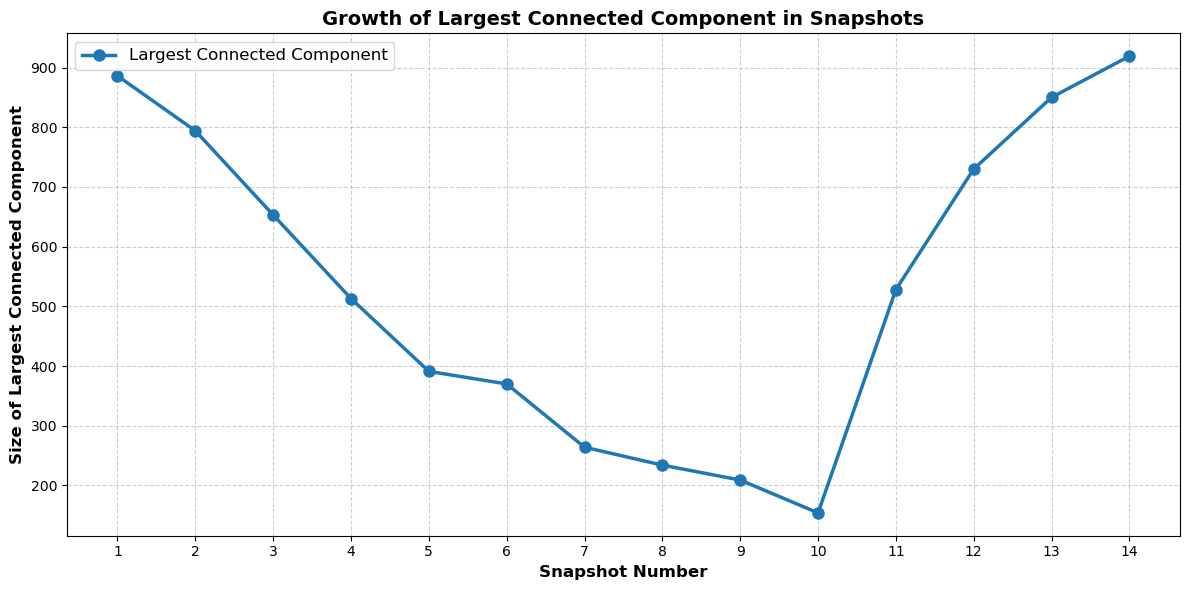

In [73]:
import matplotlib.pyplot as plt
import networkx as nx
import os

def plot_connected_components(directory_path, num_snapshots):
    """
    Plot the size of the largest connected component for each snapshot in the directory.
    
    Parameters:
        directory_path (str): Path to the directory containing graph snapshots.
        num_snapshots (int): Number of snapshots to process.
    """
    largest_components = []
    snapshots = []

    for i in range(1,num_snapshots):
        snapshot_path = os.path.join(directory_path, f"snapshot_{i}.gpickle")
        if os.path.exists(snapshot_path):
            # Read the graph
            G = nx.read_gpickle(snapshot_path)
            # Compute the size of the largest connected component
            largest_cc = len(max(nx.connected_components(G), key=len))
            largest_components.append(largest_cc)
            snapshots.append(i)
        else:
            print(f"Snapshot {i} not found in {directory_path}")
            break

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(snapshots, largest_components, marker='o', markersize=8, linewidth=2.5, label="Largest Connected Component")
    plt.title("Growth of Largest Connected Component in Snapshots", fontsize=14, fontweight='bold')
    plt.xlabel("Snapshot Number", fontsize=12, fontweight='bold')
    plt.ylabel("Size of Largest Connected Component", fontsize=12, fontweight='bold')
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.xticks(snapshots, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12, loc='best')
    plt.tight_layout()
    plt.show()

# Directory containing the graph snapshots
output_dir = "C:\\Priyanka\\dynamic-infmax-gnn-lstm\\data\\barabasi_albert_snapshots_1000"

# Plot the size of the largest connected component for each snapshot
plot_connected_components(output_dir, num_snapshots=15)
